In [25]:
import requests
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# float_format = '{:,.2f}'.format
pd.options.display.float_format = '{:,.2f}'.format


In [2]:
api_url = "https://my.cloudtalk.io/api/calls/index.json"

# credentials
idd = "X4THUIGLZTFDECBZKV6NMSD"
pw = "GgOQV5tsSpjKPm3n;Ikczv6aW1ZTfJBH!q78M2XRuL"

page = 1
limit = 1000
date_from = "2024-01-07 00:00:00"
date_to = "2024-01-10 23:59:59"

answered_df = pd.DataFrame()
missed_df = pd.DataFrame()

while True:
    print("Page: " + str(page))
    # make requests
    answered = requests.get(api_url, auth=(idd, pw), params={'page': page, 'limit': limit, 'date_from': date_from, 'date_to': date_to, 'status': 'answered'})
    
    page_count = answered.json()['responseData']['pageCount']
    
    #print(r.json())
    if answered.status_code != 200:
        print("Error: " + str(answered.status_code))
        break
    # convert to dataframe
    answered_df = pd.concat([answered_df, pd.DataFrame(answered.json()['responseData']['data'])])
    page += 1
    if page >= page_count:
        break

page = 1
while True:
    print("Page: " + str(page))
    # make requests
    missed = requests.get(api_url, auth=(idd, pw), params={'page': page, 'limit': limit, 'date_from': date_from, 'date_to': date_to, 'status': 'missed'})
    
    page_count = missed.json()['responseData']['pageCount']
    
    #print(r.json())
    if missed.status_code != 200:
        print("Error: " + str(missed.status_code))
        break
    # convert to dataframe
    missed_df = pd.concat([missed_df, pd.DataFrame(missed.json()['responseData']['data'])])
    page += 1
    if page >= page_count:
        break


Page: 1
Page: 1


In [3]:
print("Answered calls: " + str(len(answered_df)))
print("Missed calls: " + str(len(missed_df)))

Answered calls: 115
Missed calls: 210


In [4]:
answered_df.drop(columns=['Contact', 'Ratings', 'BillingCall', 'Notes', 'Tags', 'Agent','CallNumber'], inplace=True)
missed_df.drop(columns=['Contact', 'Ratings', 'BillingCall', 'Notes', 'Tags', 'Agent','CallNumber'], inplace=True)
answered_df = pd.json_normalize(answered_df['Cdr'])    
missed_df = pd.json_normalize(missed_df['Cdr'])

In [5]:
answered_df['status'] = 'answered'
missed_df['status'] = 'missed'

In [6]:
answered_df.to_excel("answered.xlsx")

ModuleNotFoundError: No module named 'openpyxl'

In [8]:
df = pd.concat([answered_df, missed_df])
df

,id,billsec,type,public_external,public_internal,recorded,is_voicemail,fax_email,is_redirected,redirected_from,...,is_local,user_id,talking_time,started_at,answered_at,ended_at,waiting_time,wrapup_time,status,recording_link
0,484694947,349,incoming,+302897027200,+302811180052,False,False,None,0,,...,True,291549,348,2024-01-10T15:21:55+01:00,2024-01-10T15:22:04+01:00,2024-01-10T15:27:52+01:00,9,30,answered,NaN
1,484659695,219,incoming,+306972866208,+302811180038,False,False,None,0,,...,True,298513,161,2024-01-10T14:52:11+01:00,2024-01-10T14:53:08+01:00,2024-01-10T14:55:49+01:00,57,30,answered,NaN
2,484653001,118,incoming,+302244047201,+302111998318,False,False,None,0,,...,True,298513,106,2024-01-10T14:47:42+01:00,2024-01-10T14:47:54+01:00,2024-01-10T14:49:40+01:00,12,21,answered,NaN
3,484648239,88,incoming,+302241085360,+302241888039,False,False,None,0,,...,True,291521,87,2024-01-10T14:43:47+01:00,2024-01-10T14:43:58+01:00,2024-01-10T14:45:25+01:00,11,30,answered,NaN
4,484623563,234,incoming,+302242022891,+302111998318,False,False,None,0,,...,True,298523,223,2024-01-10T14:18:17+01:00,2024-01-10T14:18:28+01:00,2024-01-10T14:22:11+01:00,11,4,answered,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,482235351,32,incoming,+302897027600,+302111998318,False,False,None,0,,...,True,None,0,2024-01-07T09:31:01+01:00,2024-01-07T09:31:33+01:00,2024-01-07T09:31:33+01:00,32,0,missed,NaN
206,482233979,32,incoming,+302897027600,+302111998318,False,False,None,0,,...,True,None,0,2024-01-07T09:14:51+01:00,2024-01-07T09:15:22+01:00,2024-01-07T09:15:22+01:00,31,0,missed,NaN
207,482233015,8,incoming,+302241085360,+302241888039,False,False,None,0,,...,True,None,0,2024-01-07T09:03:41+01:00,2024-01-07T09:03:49+01:00,2024-01-07T09:03:49+01:00,8,0,missed,NaN
208,482227979,32,incoming,+302897027600,+302111998318,False,False,None,0,,...,True,None,0,2024-01-07T08:42:42+01:00,2024-01-07T08:43:13+01:00,2024-01-07T08:43:13+01:00,31,0,missed,NaN


In [155]:
df.to_excel("calls.xlsx")

In [9]:
api_url = "https://analytics-api.cloudtalk.io/api/calls/{callId}"
call_id = "484942543"
r = requests.get(api_url.format(callId=call_id), auth=(idd, pw))
r.json()

{'cdr_id': 484942543,
 'uuid': '7d5ba424-6ada-4b83-92bc-4277c39e1258',
 'date': '2024-01-10T18:26:52.366Z',
 'status': 'missed',
 'call_times': {'total_time': 20,
  'ringing_time': 15,
  'talking_time': None,
  'waiting_time': 20,
  'wrap_up_time': 0},
 'company_id': 236891,
 'contact': {'country': 'GR',
  'number': '+302241085301',
  'id': 820877389,
  'name': 'FALIRAKI'},
 'call_tags': [],
 'call_rating': None,
 'internal_number': {'number': '+302241888043',
  'name': 'Faliraki',
  'id': 135497},
 'direction': 'incoming',
 'out_of_office': False,
 'type': 'regular',
 'call_steps': [{'type': 'queue',
   'id': 155487,
   'name': 'Reservations',
   'agent_calls': [{'type': 'agent',
     'call_id': '7d5ba424-6ada-4b83-92bc-4277c39e1258',
     'id': 291543,
     'name': 'Christina Vereraki RIN',
     'resolved_by': None,
     'resolved_by_call': {'id': None,
      'date': None,
      'agent': {'id': None, 'name': None}},
     'status': 'missed',
     'date': '2024-01-10T18:26:53.088Z',
  

In [157]:
#info = r.json()['call_times'] 
#info['direction'] = r.json()['direction']
#info['cdr_id'] = r.json()['cdr_id']
#info['type'] = r.json()['type']
#info['status'] = r.json()['status']
#info

In [10]:
unique_cdr_ids = df['id'].unique()
# api call to get call details
call_info = pd.DataFrame()
api_url = "https://analytics-api.cloudtalk.io/api/calls/{callId}"
for idx, call_id in enumerate(unique_cdr_ids):
    print(f"{idx}/{len(unique_cdr_ids)}")
    r = requests.get(api_url.format(callId=call_id), auth=(idd, pw))
    if r.status_code != 200:
        print("Error: " + str(r.status_code))
        continue
    info = r.json()['call_times'] 
    info['direction'] = r.json()['direction']
    info['cdr_id'] = r.json()['cdr_id']
    info['type'] = r.json()['type']
    info['status'] = r.json()['status']
    info['location'] = r.json()['internal_number']['name']
    call_info = pd.concat([call_info, pd.DataFrame([info])], ignore_index=True)


call_info

0/325
1/325
2/325
3/325
4/325
5/325
6/325
7/325
8/325
9/325
10/325
11/325
12/325
13/325
14/325
15/325
16/325
Error: 404
17/325
Error: 404
18/325
19/325
20/325
21/325
22/325
23/325
24/325
25/325
26/325
27/325
28/325
29/325
30/325
Error: 404
31/325
32/325
33/325
34/325
35/325
Error: 404
36/325
Error: 404
37/325
38/325
39/325
40/325
41/325
42/325
43/325
44/325
45/325
46/325
47/325
Error: 404
48/325
49/325
Error: 404
50/325
51/325
52/325
Error: 404
53/325
Error: 404
54/325
55/325
56/325
57/325
Error: 404
58/325
59/325
60/325
Error: 404
61/325
Error: 404
62/325
63/325
Error: 404
64/325
65/325
Error: 404
66/325
67/325
68/325
69/325
70/325
71/325
72/325
73/325
74/325
75/325
76/325
77/325
78/325
79/325
80/325
81/325
82/325
83/325
84/325
85/325
Error: 404
86/325
Error: 404
87/325
88/325
Error: 404
89/325
Error: 404
90/325
91/325
92/325
93/325
94/325
95/325
96/325
97/325
98/325
99/325
100/325
101/325
102/325
103/325
104/325
105/325
106/325
107/325
108/325
109/325
Error: 404
110/325
Error: 404
11

,total_time,ringing_time,talking_time,waiting_time,wrap_up_time,direction,cdr_id,type,status,location
0,386,8,348,8,30,incoming,484694947,regular,answered,Royal Mare
1,200,9,161,10,30,incoming,484659695,regular,answered,Laguna
2,139,11,107,11,21,incoming,484653001,regular,answered,Other (Airport Reps)
3,103,9,87,9,7,incoming,484648239,regular,answered,Alila
4,233,10,222,11,4,incoming,484623563,regular,answered,Other (Airport Reps)
...,...,...,...,...,...,...,...,...,...,...
298,31,None,None,31,0,incoming,482235351,regular,missed,Other (Airport Reps)
299,30,None,None,30,0,incoming,482233979,regular,missed,Other (Airport Reps)
300,None,None,None,0,0,incoming,482233015,regular,missed,Alila
301,30,None,None,30,0,incoming,482227979,regular,missed,Other (Airport Reps)


In [11]:
df['id'] = df['id'].astype(str)
call_info['cdr_id'] = call_info['cdr_id'].astype(str)

In [12]:
all_call_info = pd.merge(df, call_info, left_on='id', right_on='cdr_id', how='left')
all_call_info

,id,billsec,type_x,public_external,public_internal,recorded,is_voicemail,fax_email,is_redirected,redirected_from,...,total_time,ringing_time,talking_time_y,waiting_time_y,wrap_up_time,direction,cdr_id,type_y,status_y,location
0,484694947,349,incoming,+302897027200,+302811180052,False,False,None,0,,...,386,8,348,8,30.0,incoming,484694947,regular,answered,Royal Mare
1,484659695,219,incoming,+306972866208,+302811180038,False,False,None,0,,...,200,9,161,10,30.0,incoming,484659695,regular,answered,Laguna
2,484653001,118,incoming,+302244047201,+302111998318,False,False,None,0,,...,139,11,107,11,21.0,incoming,484653001,regular,answered,Other (Airport Reps)
3,484648239,88,incoming,+302241085360,+302241888039,False,False,None,0,,...,103,9,87,9,7.0,incoming,484648239,regular,answered,Alila
4,484623563,234,incoming,+302242022891,+302111998318,False,False,None,0,,...,233,10,222,11,4.0,incoming,484623563,regular,answered,Other (Airport Reps)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,482235351,32,incoming,+302897027600,+302111998318,False,False,None,0,,...,31,None,None,31,0.0,incoming,482235351,regular,missed,Other (Airport Reps)
321,482233979,32,incoming,+302897027600,+302111998318,False,False,None,0,,...,30,None,None,30,0.0,incoming,482233979,regular,missed,Other (Airport Reps)
322,482233015,8,incoming,+302241085360,+302241888039,False,False,None,0,,...,None,None,None,0,0.0,incoming,482233015,regular,missed,Alila
323,482227979,32,incoming,+302897027600,+302111998318,False,False,None,0,,...,30,None,None,30,0.0,incoming,482227979,regular,missed,Other (Airport Reps)


In [13]:
# agents 
api_url = "https://my.cloudtalk.io/api/agents/index.json"
r = requests.get(api_url, auth=(idd, pw))
agents = pd.DataFrame(r.json()['responseData']['data'])
agents = pd.json_normalize(agents['Agent'])
agents = agents[['id', 'firstname', 'lastname', 'email']]
agents.rename(columns={'id': 'agent_id', 'firstname':'agent_name', 'lastname':'agent_site'}, inplace=True)
agents

,agent_id,agent_name,agent_site,email
0,279503,Lazaros,Lazaridis / Mitsis Group IT,lazaros.lazaridis@mitsis.com
1,291513,Tasos Ftaklas,ALI,alila.res@mitsis.com
2,291517,Rosana Passaris,BLD,bluedomes.res@mitsishotels.com
3,291519,Antonis Kolidakis,CVI,cretanvillage.res@mitsishotels.com
4,291521,Despoina Gonou,FAL,faliraki.res@mitsishotels.com
5,291523,Despoina Kazantzidou,FAV,familyvillage.res@mitsishotels.com
6,291525,Chrysanthi Sykioti,GAL,galini.res@mitsishotels.com
7,291527,Eleni Kastelloriziou,GRA,grandhotel.res@mitsishotels.com
8,291529,Aristea Vrachnaki,LAG,laguna.res@mitsishotels.com
9,291533,Christina Diakonikola,LAV,lavita.res@mitsishotels.com


In [14]:
all_call_info = pd.merge(all_call_info, agents, left_on='user_id', right_on='agent_id', how='left')
all_call_info['agent_name'] = all_call_info['agent_name'].fillna(all_call_info['location'])
all_call_info['agent_id'] = all_call_info['agent_id'].fillna('999')
all_call_info

,id,billsec,type_x,public_external,public_internal,recorded,is_voicemail,fax_email,is_redirected,redirected_from,...,wrap_up_time,direction,cdr_id,type_y,status_y,location,agent_id,agent_name,agent_site,email
0,484694947,349,incoming,+302897027200,+302811180052,False,False,None,0,,...,30.0,incoming,484694947,regular,answered,Royal Mare,291549,Giorgos Mandalakis,RMA,royalmare.res@mitsishotels.com
1,484659695,219,incoming,+306972866208,+302811180038,False,False,None,0,,...,30.0,incoming,484659695,regular,answered,Laguna,298513,Tsampika Spanou,RHO,rho.rep@mitsis.com
2,484653001,118,incoming,+302244047201,+302111998318,False,False,None,0,,...,21.0,incoming,484653001,regular,answered,Other (Airport Reps),298513,Tsampika Spanou,RHO,rho.rep@mitsis.com
3,484648239,88,incoming,+302241085360,+302241888039,False,False,None,0,,...,7.0,incoming,484648239,regular,answered,Alila,291521,Despoina Gonou,FAL,faliraki.res@mitsishotels.com
4,484623563,234,incoming,+302242022891,+302111998318,False,False,None,0,,...,4.0,incoming,484623563,regular,answered,Other (Airport Reps),298523,Ilias Papaioannou,KGS,kgs.rep@mitsis.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,482235351,32,incoming,+302897027600,+302111998318,False,False,None,0,,...,0.0,incoming,482235351,regular,missed,Other (Airport Reps),999,Other (Airport Reps),NaN,NaN
321,482233979,32,incoming,+302897027600,+302111998318,False,False,None,0,,...,0.0,incoming,482233979,regular,missed,Other (Airport Reps),999,Other (Airport Reps),NaN,NaN
322,482233015,8,incoming,+302241085360,+302241888039,False,False,None,0,,...,0.0,incoming,482233015,regular,missed,Alila,999,Alila,NaN,NaN
323,482227979,32,incoming,+302897027600,+302111998318,False,False,None,0,,...,0.0,incoming,482227979,regular,missed,Other (Airport Reps),999,Other (Airport Reps),NaN,NaN


In [15]:
all_call_info['status_y'] = all_call_info['status_y'].fillna(all_call_info['status_x'])
all_call_info['talking_time_y'] = all_call_info['talking_time_y'].fillna(all_call_info['talking_time_x'])
all_call_info['waiting_time_y'] = all_call_info['waiting_time_y'].fillna(all_call_info['waiting_time_x'])
all_call_info.drop(columns=['status_x'], inplace=True)
all_call_info.drop(columns=['talking_time_x'], inplace=True)
all_call_info.drop(columns=['waiting_time_x'], inplace=True)


In [16]:
all_call_info.rename(columns={'status_y': 'status', 'talking_time_y':'talking_time', 'waiting_time_y':'waiting_time'}, inplace=True)

In [17]:
all_call_info.to_excel('all_call_info.xlsx', index=False)

In [18]:
all_call_info.columns

Index(['id', 'billsec', 'type_x', 'public_external', 'public_internal',
       'recorded', 'is_voicemail', 'fax_email', 'is_redirected',
       'redirected_from', 'transferred_from', 'is_local', 'user_id',
       'started_at', 'answered_at', 'ended_at', 'wrapup_time',
       'recording_link', 'total_time', 'ringing_time', 'talking_time',
       'waiting_time', 'wrap_up_time', 'direction', 'cdr_id', 'type_y',
       'status', 'location', 'agent_id', 'agent_name', 'agent_site', 'email'],
      dtype='object')

# •	Unanswered calls per agent (+ answered)

In [19]:
all_call_info[all_call_info['agent_id'] == '291517']

,id,billsec,type_x,public_external,public_internal,recorded,is_voicemail,fax_email,is_redirected,redirected_from,...,wrap_up_time,direction,cdr_id,type_y,status,location,agent_id,agent_name,agent_site,email
15,484490405,531,incoming,+447958671192,+302111998566,False,False,None,0,,...,5.0,incoming,484490405,regular,answered,Blue Domes,291517,Rosana Passaris,BLD,bluedomes.res@mitsishotels.com
39,483606195,14,incoming,+306986614455,+302111998566,False,False,None,0,,...,5.0,incoming,483606195,regular,answered,Blue Domes,291517,Rosana Passaris,BLD,bluedomes.res@mitsishotels.com
41,483589791,60,incoming,+302144167007,+302111998566,False,False,None,0,,...,4.0,incoming,483589791,regular,answered,Blue Domes,291517,Rosana Passaris,BLD,bluedomes.res@mitsishotels.com
42,483588339,45,incoming,+302144167007,+302111998566,False,False,None,0,,...,6.0,incoming,483588339,regular,answered,Blue Domes,291517,Rosana Passaris,BLD,bluedomes.res@mitsishotels.com
43,483587005,267,incoming,+302144167007,+302111998566,False,False,None,0,,...,8.0,incoming,483587005,regular,answered,Blue Domes,291517,Rosana Passaris,BLD,bluedomes.res@mitsishotels.com
58,483525027,657,incoming,+447958671192,+302111998566,False,False,None,0,,...,4.0,incoming,483525027,regular,answered,Blue Domes,291517,Rosana Passaris,BLD,bluedomes.res@mitsishotels.com
64,483466203,306,incoming,+31639478502,+302111998566,False,False,None,0,,...,5.0,incoming,483466203,regular,answered,Blue Domes,291517,Rosana Passaris,BLD,bluedomes.res@mitsishotels.com
67,483444063,64,incoming,+306986614455,+302111998566,False,False,None,0,,...,6.0,incoming,483444063,regular,answered,Blue Domes,291517,Rosana Passaris,BLD,bluedomes.res@mitsishotels.com
68,483442643,62,incoming,+306986614455,+302111998566,False,False,None,0,,...,7.0,incoming,483442643,regular,answered,Blue Domes,291517,Rosana Passaris,BLD,bluedomes.res@mitsishotels.com
69,483436779,26,incoming,+498133996987,+302111998566,False,False,None,0,,...,7.0,incoming,483436779,regular,answered,Blue Domes,291517,Rosana Passaris,BLD,bluedomes.res@mitsishotels.com


In [27]:
all_call_info['talking_time'] = all_call_info['talking_time'].astype(float)
all_call_info['waiting_time'] = all_call_info['waiting_time'].astype(float)
all_call_info['total_time'] = all_call_info['total_time'].astype(float)
agents = all_call_info.groupby(['agent_id', 'agent_name']).agg(Calls=('id', 'count'), Avg_Talking_Time=('talking_time', 'mean'), Avg_Waiting_Time=('waiting_time', 'mean'), Avg_Total_Time=('total_time', 'mean'), 
                                                                Total_Talking_Time=('talking_time', 'sum'), Total_Waiting_Time=('waiting_time', 'sum'), Total_Time=('total_time', 'sum')
                                                                ).reset_index()
# Crosstab to count 'missed' and 'answered' calls
status_counts = pd.crosstab(index=[all_call_info['agent_id'], all_call_info['agent_name']], columns=all_call_info['status'])

# Merge the two DataFrames
agents = pd.merge(agents, status_counts, how='left', left_on=['agent_id', 'agent_name'], right_index=True)

# If you want to rename the status columns for clarity
agents.rename(columns={'answered': 'Answered_Calls', 'missed': 'Missed_Calls'}, inplace=True)
print(agents['Answered_Calls'].sum())
print(agents['Missed_Calls'].sum())
agents

117
208


,agent_id,agent_name,Calls,Avg_Talking_Time,Avg_Waiting_Time,Avg_Total_Time,Total_Talking_Time,Total_Waiting_Time,Total_Time,Answered_Calls,Missed_Calls
0,291513,Tasos Ftaklas,6,224.166667,12.833333,356.500000,1345.0,77.0,1426.0,5,1
1,291517,Rosana Passaris,13,159.000000,10.538462,192.500000,2067.0,137.0,2310.0,12,1
2,291519,Antonis Kolidakis,7,144.714286,26.428571,216.500000,1013.0,185.0,1299.0,4,3
3,291521,Despoina Gonou,12,147.166667,11.666667,181.454545,1766.0,140.0,1996.0,11,1
4,291527,Eleni Kastelloriziou,1,0.000000,9.000000,9.000000,0.0,9.0,9.0,0,1
5,291529,Aristea Vrachnaki,5,43.600000,11.200000,68.800000,218.0,56.0,344.0,5,0
6,291533,Christina Diakonikola,1,60.000000,26.000000,116.000000,60.0,26.0,116.0,1,0
7,291535,Maria Fegkou,2,202.000000,12.500000,233.500000,404.0,25.0,467.0,2,0
8,291543,Christina Vereraki,16,125.125000,13.250000,201.545455,2002.0,212.0,2217.0,9,7
9,291549,Giorgos Mandalakis,4,102.000000,10.500000,149.333333,408.0,42.0,448.0,3,1


# Unanswered calls per agent excluding internal calls

In [28]:
all_info_excl_internal = all_call_info[all_call_info['type_x'] != 'internal']
agents_ext = all_info_excl_internal.groupby(['agent_id', 'agent_name']).agg(Calls=('id', 'count'), Avg_Talking_Time=('talking_time', 'mean'), Avg_Waiting_Time=('waiting_time', 'mean'), Avg_Total_Time=('total_time', 'mean'),
                                                                            Total_Talking_Time=('talking_time', 'sum'), Total_Waiting_Time=('waiting_time', 'sum'), Total_Time=('total_time', 'sum')).reset_index()
# Crosstab to count 'missed' and 'answered' calls
status_counts = pd.crosstab(index=[all_info_excl_internal['agent_id'], all_info_excl_internal['agent_name']], columns=all_info_excl_internal['status'])

# Merge the two DataFrames
agents_ext = pd.merge(agents_ext, status_counts, how='left', left_on=['agent_id', 'agent_name'], right_index=True)

# If you want to rename the status columns for clarity
agents_ext.rename(columns={'answered': 'Answered_Calls', 'missed': 'Missed_Calls'}, inplace=True)
print(agents_ext['Answered_Calls'].sum())
print(agents_ext['Missed_Calls'].sum())
agents_ext


107
206


,agent_id,agent_name,Calls,Avg_Talking_Time,Avg_Waiting_Time,Avg_Total_Time,Total_Talking_Time,Total_Waiting_Time,Total_Time,Answered_Calls,Missed_Calls
0,291513,Tasos Ftaklas,4,329.250000,14.000000,356.500000,1317.0,56.0,1426.0,3,1
1,291517,Rosana Passaris,13,159.000000,10.538462,192.500000,2067.0,137.0,2310.0,12,1
2,291519,Antonis Kolidakis,6,164.166667,29.000000,216.500000,985.0,174.0,1299.0,3,3
3,291521,Despoina Gonou,12,147.166667,11.666667,181.454545,1766.0,140.0,1996.0,11,1
4,291527,Eleni Kastelloriziou,1,0.000000,9.000000,9.000000,0.0,9.0,9.0,0,1
5,291529,Aristea Vrachnaki,5,43.600000,11.200000,68.800000,218.0,56.0,344.0,5,0
6,291533,Christina Diakonikola,1,60.000000,26.000000,116.000000,60.0,26.0,116.0,1,0
7,291535,Maria Fegkou,2,202.000000,12.500000,233.500000,404.0,25.0,467.0,2,0
8,291543,Christina Vereraki,14,139.785714,13.928571,201.545455,1957.0,195.0,2217.0,8,6
9,291549,Giorgos Mandalakis,3,120.000000,9.333333,149.333333,360.0,28.0,448.0,2,1


# •	Unanswered unique number calls per agent (no internal)

In [22]:
unanswered_calls = all_call_info[all_call_info['status'] == 'missed']

unanswered_call_counts = unanswered_calls.groupby(['agent_id', 'agent_name']).agg(Unanswered_Cdr_UniqCount=('id', 'nunique')).reset_index()
print(unanswered_call_counts['Unanswered_Cdr_UniqCount'].sum())
unanswered_call_counts

208


,agent_id,agent_name,Unanswered_Cdr_UniqCount
0,291513,Tasos Ftaklas,1
1,291517,Rosana Passaris,1
2,291519,Antonis Kolidakis,3
3,291521,Despoina Gonou,1
4,291527,Eleni Kastelloriziou,1
5,291543,Christina Vereraki,7
6,291549,Giorgos Mandalakis,1
7,298513,Tsampika Spanou,1
8,298523,Ilias Papaioannou,4
9,298985,Alexandros Chruysikopoulos,4


# •	Return call rate per unique incoming unanswered number
# •	Return call rate per unique incoming unanswered number per agent

**cdr_type** values: "power_dialer" "predictive_dialer" "callback" "redirected" "transferred" "regular"

"Callback" type is not provided since once a call is returned from an agent, the previous missed call is lost from the data.

# •	Distribution of unanswered calls per ring time (0-10s, 10-20s, etc.)

id                0
ringing_time    118
dtype: int64


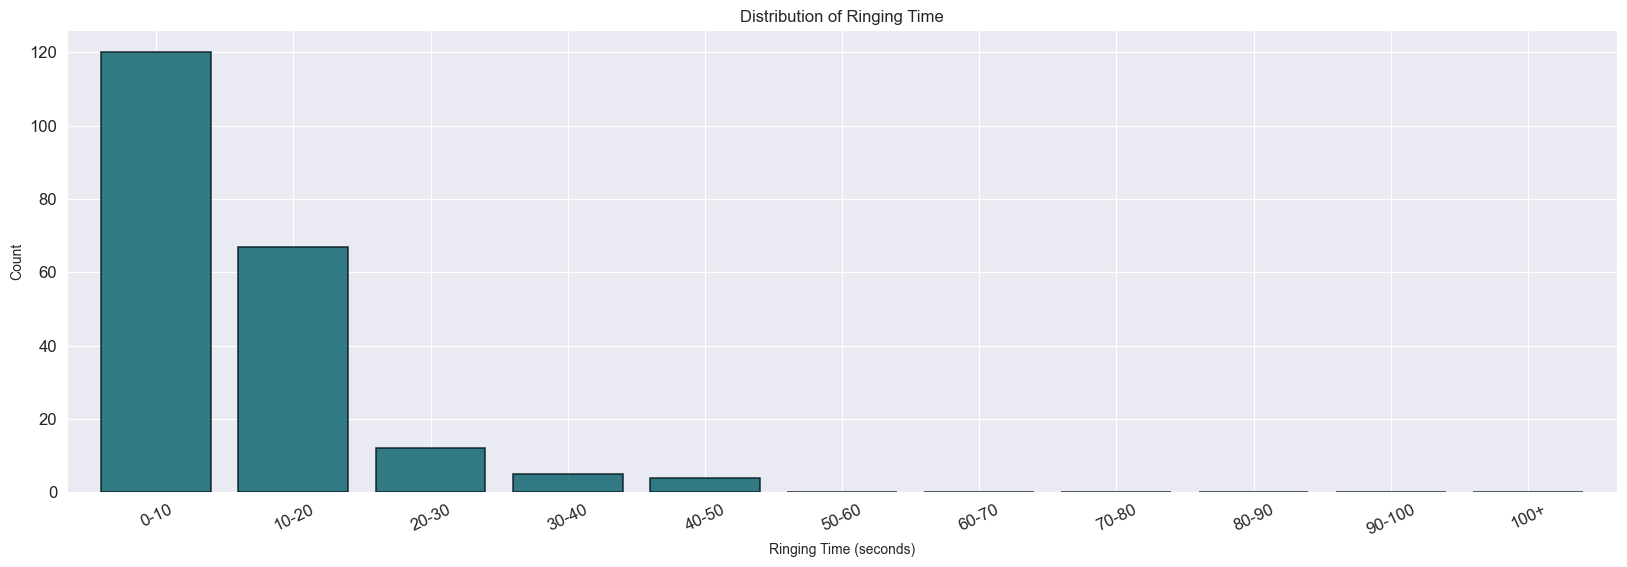

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
unanswered_calls_ring = unanswered_calls[['id', 'ringing_time']]
print(unanswered_calls_ring.isna().sum())
# input missing values with 0
unanswered_calls_ring['ringing_time'] = unanswered_calls_ring['ringing_time'].fillna(0)

# Define your bins (adjust according to your data range and needs)
bins = [-1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100+']

# Categorize ringing time into bins
unanswered_calls_ring['ringing_time_pct'] = pd.cut(unanswered_calls_ring['ringing_time'], bins, labels=labels)

# plot the distribution
_ = unanswered_calls_ring['ringing_time_pct'].value_counts().sort_index().plot.bar(color='#045e68', figsize=(20, 6), title='Distribution of Ringing Time', rot=25, fontsize=12, xlabel='Ringing Time (seconds)', ylabel='Count', width=0.8, 
                                                                                   edgecolor='#00141b', linewidth=1.2, zorder=3, grid=True, alpha=0.8)



In [254]:
all_call_info[['answered_at', 'ended_at']] = all_call_info[['answered_at', 'ended_at']].apply(pd.to_datetime, errors='coerce')
all_call_info['answered_at'] = all_call_info['answered_at'].dt.tz_localize(None)
all_call_info['ended_at'] = all_call_info['ended_at'].dt.tz_localize(None)

# Distribution of unanswered calls per hour and agent
# Create a new column with the hour of the day
all_call_info['hour'] = all_call_info['answered_at'].dt.hour

# Show distribution of unanswered calls per hour and agent in a pivot table
unanswered_calls_hour = all_call_info[all_call_info['status'] == 'missed'].pivot_table(index=['agent_id', 'agent_name'], columns='hour', values='id', aggfunc='count', margins=True, margins_name='Total').fillna(0).astype(int)
unanswered_calls_hour

,hour,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,Total
agent_id,agent_name,,,,,,,,,,,,,,,,
291513,Tasos Ftaklas,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
291517,Rosana Passaris,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
291519,Antonis Kolidakis,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,3
291521,Despoina Gonou,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
291527,Eleni Kastelloriziou,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
291543,Christina Vereraki,0,0,1,1,1,2,0,2,0,0,0,0,0,0,0,7
291549,Giorgos Mandalakis,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
298513,Tsampika Spanou,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
298523,Ilias Papaioannou,0,1,1,0,0,2,0,0,0,0,0,0,0,0,0,4


In [255]:
unanswered_calls_hour.reset_index(inplace=True)
unanswered_calls_hour.set_index(["agent_id", "agent_name"], inplace=True)
unanswered_calls_hour.drop(index='Total', inplace=True)
unanswered_calls_hour.drop(columns='Total', inplace=True)
unanswered_calls_hour

,hour,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
agent_id,agent_name,,,,,,,,,,,,,,,
291513,Tasos Ftaklas,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
291517,Rosana Passaris,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
291519,Antonis Kolidakis,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0
291521,Despoina Gonou,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
291527,Eleni Kastelloriziou,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
291543,Christina Vereraki,0,0,1,1,1,2,0,2,0,0,0,0,0,0,0
291549,Giorgos Mandalakis,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
298513,Tsampika Spanou,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
298523,Ilias Papaioannou,0,1,1,0,0,2,0,0,0,0,0,0,0,0,0


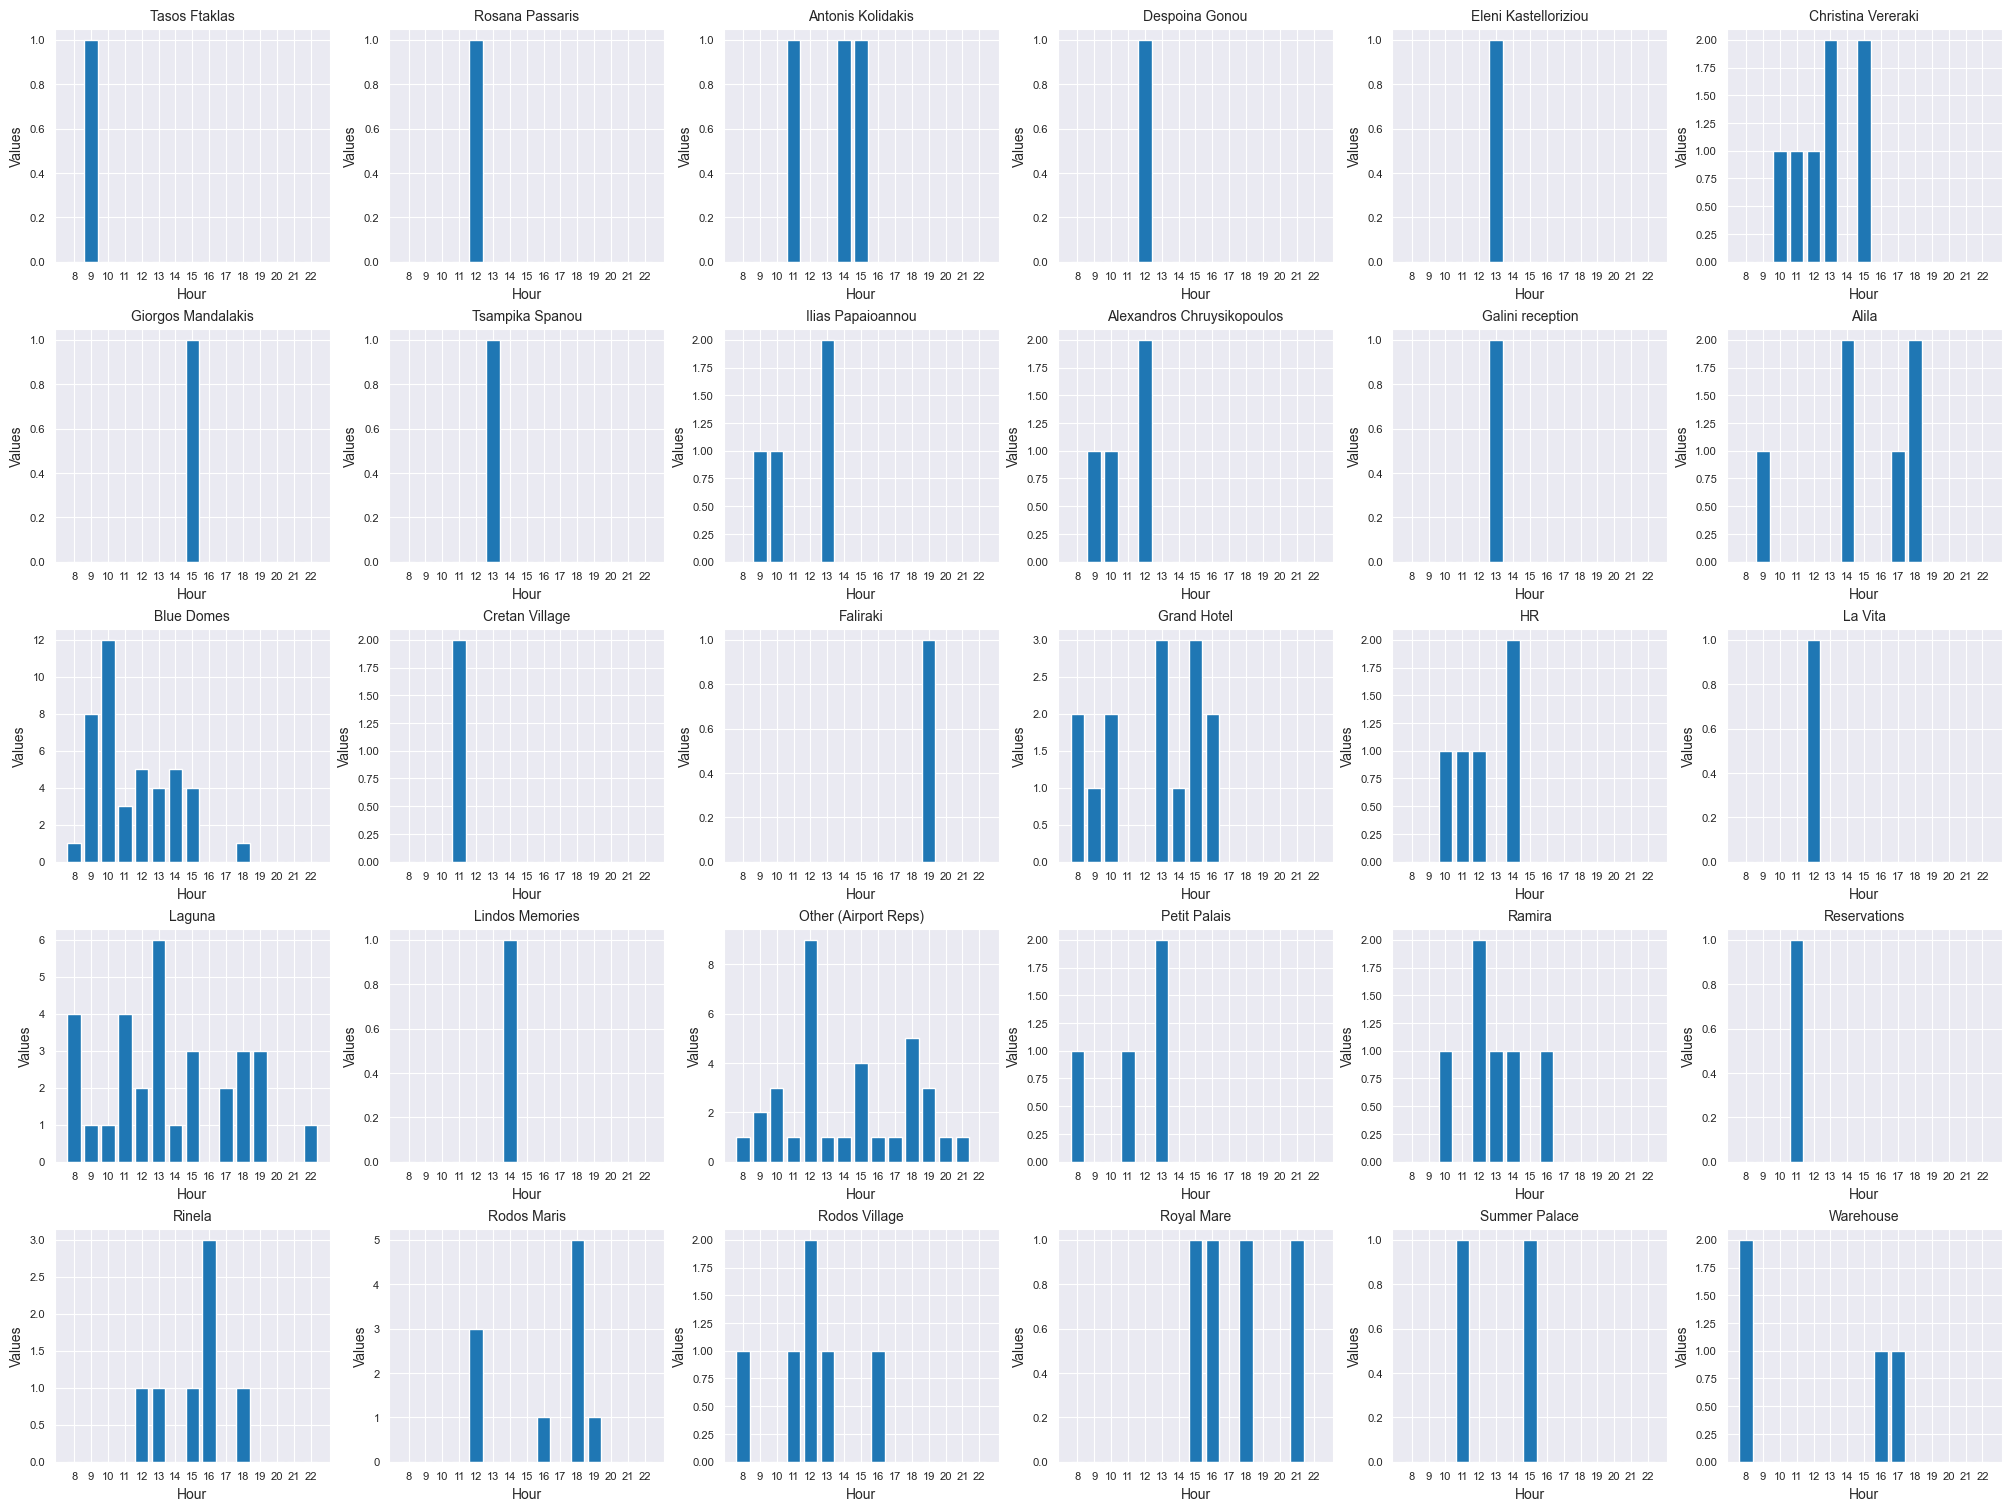

In [256]:
# Number of agents
num_agents = len(unanswered_calls_hour)

# Creating a grid for subplots
nrows = int(num_agents**0.5)
ncols = int(num_agents / nrows) + (num_agents % nrows > 0)

# Creating subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 15), constrained_layout=True)

# Flattening the axes array for easy iteration
axes = axes.flatten()

# Plotting in each subplot
for i, (index, row) in enumerate(unanswered_calls_hour.iterrows()):
    axes[i].bar(row.index.astype(str), row.values)  # Convert index to string
    axes[i].set_title(f"{index[1]}", fontsize=10)
    axes[i].set_xlabel("Hour")
    axes[i].set_ylabel("Values")
    axes[i].tick_params(labelsize=8)


# Hiding any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

#	Call time per agent, excluding internal calls